# **ULMFit on Twitter US Airlines data**

**ULMFit introduction:**

ULMFiT is a Transfer learning technique used for any NLP task and accomplish really great outcomes,Proposed by fast.ai’s Jeremy Howard and NUI Galway Insight Center’s Sebastian Ruder 

ULMFiT uses a regular LSTM  which is the state-of-the-art language model architecture. The LSTM network has 3 layers. This single architecture is used throughout – for pre-training as well as for fine-tuning.
<!-- ULMFiT achieves state-of-the-art result using novel techniques like:
Discriminative fine-tuning
Slanted triangular learning rates, and
Gradual unfreezing -->


This Notebook is bult in Google Colab,In google colab all the other libraries pre- installed except fastai,pytorch, So I am installing them only

In [0]:
#Installing Pytorch,fastai
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
     |████████████████████████████████| 704.8MB 25kB/s 
ERROR: Operation cancelled by user


In [0]:
#import libraries
import pandas as pd     #pandas library
import numpy as np      #numpy library
import fastai           #ULMFIt model
from fastai import *    
from fastai.text import * 
import io             #stream data
import os             #path 

In [11]:
#Load Twitter US airlines data
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets (1).csv


In [12]:
#read the data
df = pd.read_csv(io.StringIO(uploaded['Tweets.csv'].decode('utf-8')))
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Data Preparation**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [14]:
#Target Variables
print(df.airline_sentiment.isnull().sum())
print(df.text.isnull().sum())


0
0


No NA's in target field airline_sentiment and in text field useful for sentiment analysis

airline_sentiment is the variable which is labelled with positive,negative,neutral. 
Let's see the count of each label


In [15]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

More negative tweets,it's a little imbalanced class as well

# EDA


## Univariate Analysis



In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks


Analyzing important variables

Text(0, 0.5, 'Frequency')

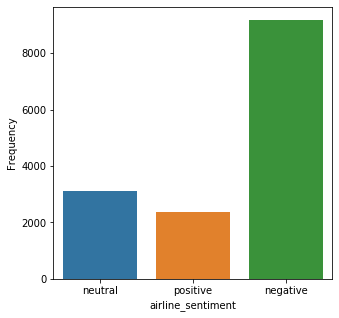

In [17]:
# airline_sentiment 
plt.figure(figsize=(5,5))
sns.countplot(df["airline_sentiment"])
plt.ylabel('Frequency') 


Text(0, 0.5, 'Frequency')

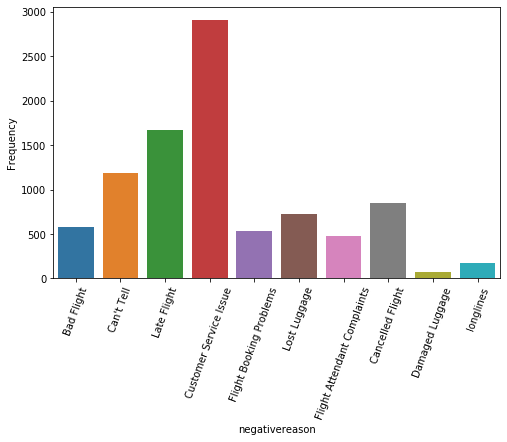

In [18]:
#negative reason
plt.figure(figsize=(8,5))
sns.countplot(df["negativereason"])
xticks(rotation = 70)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

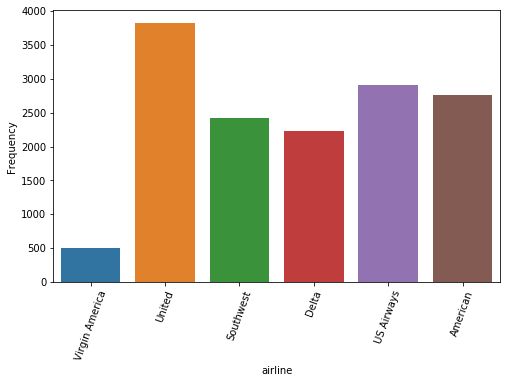

In [19]:
#airline

plt.figure(figsize=(8,5))
sns.countplot(df["airline"])
xticks(rotation = 70)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

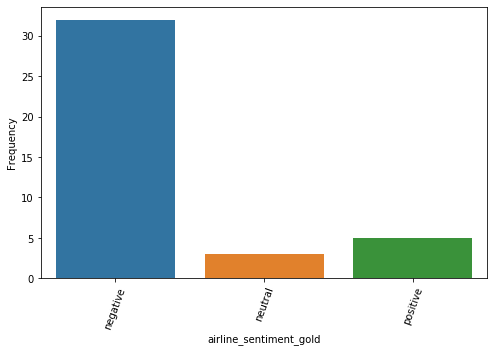

In [20]:

plt.figure(figsize=(8,5))
sns.countplot(df["airline_sentiment_gold"])
xticks(rotation = 70)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

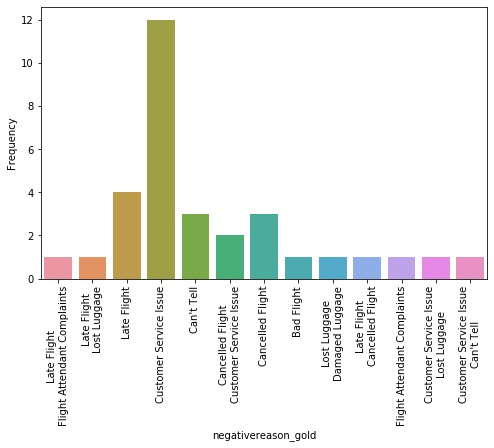

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(df["negativereason_gold"])
xticks(rotation = 90)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

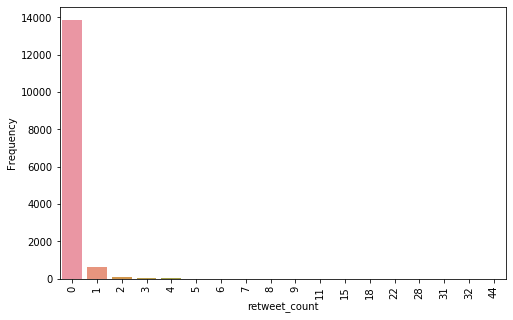

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(df["retweet_count"])
xticks(rotation = 90)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

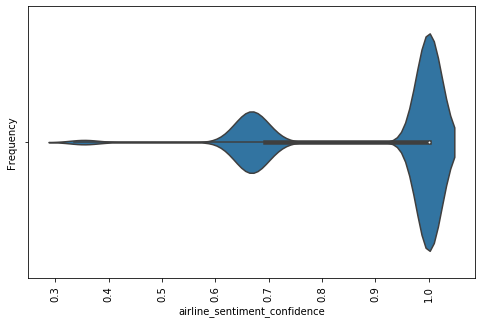

In [23]:
#airline_sentiment_confidence

plt.figure(figsize=(8,5))
sns.violinplot(df["airline_sentiment_confidence"])
xticks(rotation = 90)
plt.ylabel('Frequency')



In [24]:
#Calculating lengths of each text
df['txtlen'] = df.text.str.len()

df.txtlen

0         35
1         72
2         71
3        126
4         55
        ... 
14635     63
14636    150
14637     60
14638    135
14639    138
Name: txtlen, Length: 14640, dtype: int64

Text(0.5, 0, 'Text Length')

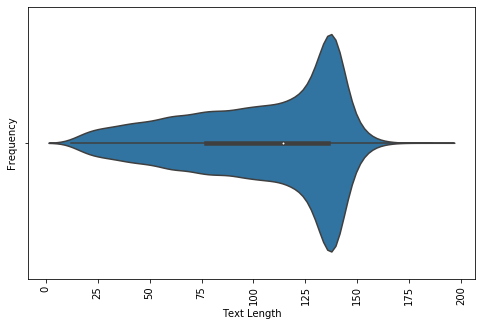

In [25]:
plt.figure(figsize=(8,5))
sns.violinplot(df["txtlen"])
xticks(rotation = 90)
plt.ylabel('Frequency')
plt.xlabel('Text Length')

EDA Findings:

On Total,there are 9176 negative tweets compared to 3099 nuetral 2363 positive tweets,more negativity

**Customer service** is the leading reason for negative tweets and then followed by **late flights**

**UNITED Airlines** has the most no.of tweets aand followed by **US Airways**

**Negative** tweets having higher confidence level 

Longest tweets have more chance to be negatives

A very less number of retweets



Bivariate Analysis

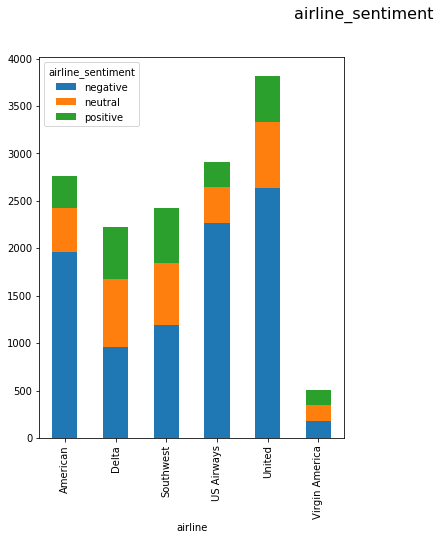

In [26]:
fig = plt.figure(1,figsize=(12,7))
fig.suptitle('airline_sentiment',fontsize=16)


ax1 = fig.add_subplot(121)
df.groupby(['airline','airline_sentiment']).size().unstack().plot(ax=ax1, kind='bar',stacked = True)


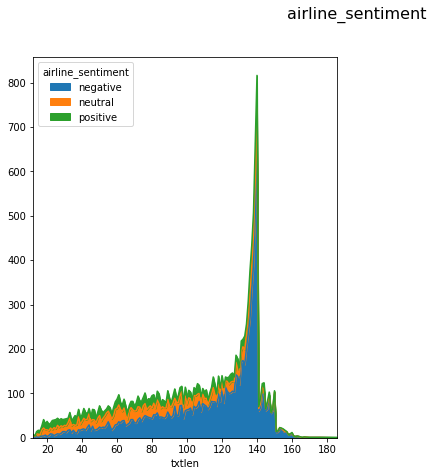

In [27]:
fig = plt.figure(1,figsize=(12,7))
fig.suptitle('airline_sentiment',fontsize=16)


ax1 = fig.add_subplot(121)
df.groupby(['txtlen','airline_sentiment']).size().unstack().plot(ax=ax1, kind='area',stacked = True)

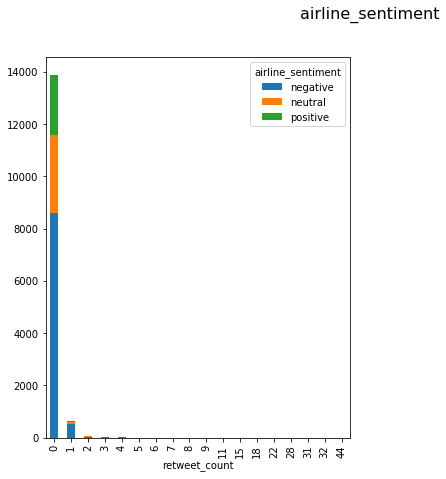

In [28]:
fig = plt.figure(1,figsize=(12,7))
fig.suptitle('airline_sentiment',fontsize=16)


ax1 = fig.add_subplot(121)
df.groupby(['retweet_count','airline_sentiment']).size().unstack().plot(ax=ax1, kind='bar',stacked = True)



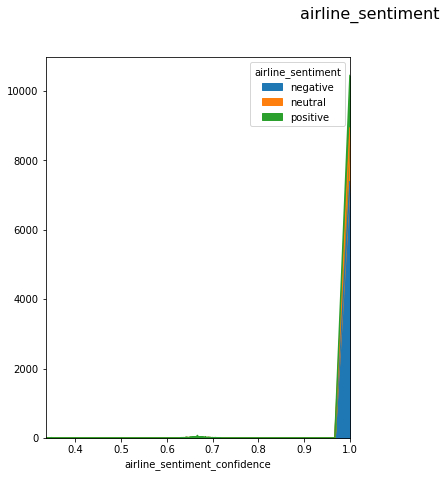

In [29]:
fig = plt.figure(1,figsize=(12,7))
fig.suptitle('airline_sentiment',fontsize=16)


ax1 = fig.add_subplot(121)
df.groupby(['airline_sentiment_confidence','airline_sentiment']).size().unstack().plot(ax=ax1, kind='area',stacked = True)






## **Sentiment Analysis**:




For sentiment analysis, the fields text,airline sentiment are seperated and made as a new dataframe(In order not to touch original data frame). airline_sentiment name has changed to label


In [0]:
df1 = pd.DataFrame(columns=['text', 'label'])

In [0]:
df1['text'] = df['text']

In [0]:
df1['label'] = df['airline_sentiment']

### **Cleaning text** 


In [33]:
#removing the tag @airlinename and generalizing with text 'airline'

regex=r"@(VirginAmerica|united|SouthwestAir|Delta|USAirways|AmericanAir|JetBlue)"
def replace(text):
    return re.sub(regex, '@airline',text, flags=re.IGNORECASE)
df1['text']=df1['text'].apply(replace)
df1['text'].sample(10)

14096    @airline we have 3 more passengers with me   T...
10692    @airline literally the worst flying experience...
9677     @airline denied me standby bc of checked bag i...
1449     @airline bull crap.  I spent $600 on a recent ...
4617     @airline sent. looking for that functionality ...
12454    @airline You should be apologizing for your ru...
12542    @airline and btwn gate a8 &amp; a15 I lost a d...
10526    @airline Yes, it's February. Bad weather happe...
10707    @airline 13 years of Naval Service and I run t...
4441     @airline INSANE traffic in LA. Trying to call ...
Name: text, dtype: object

In [34]:
#removing special charaters 
df1['text'] = df1['text'].str.replace("[^a-zA-Z]", " ")
df1


,text,label
0,airline What dhepburn said,neutral
1,airline plus you ve added commercials to the ...,positive
2,airline I didn t today Must mean I need to...,neutral
3,airline it s really aggressive to blast obnox...,negative
4,airline and it s a really big bad thing about it,negative
...,...,...
14635,airline thank you we got on a different fligh...,positive
14636,airline leaving over minutes Late Flight ...,negative
14637,airline Please bring American Airlines to Bl...,neutral
14638,airline you have my money you change my flig...,negative


To Remove stop words

In [35]:
#stop words
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# tokenization 
tokenized_doc = df1['text'].apply(lambda x: x.split())

# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization 
detokenized_doc = [] 
for i in tokenized_doc.index: 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 

df1['text'] = detokenized_doc

### Modelling with ULMFit

In [0]:
from sklearn.model_selection import train_test_split


#  split data into training and validation set
df_trn, df_val = train_test_split(df1, stratify = df1['label'], test_size = 0.2, random_state = 12)

In [39]:
df_trn.head()

,text,label
12339,airline thanks getting back frequently weather...,neutral
1239,airline love new st class breakfast,positive
2142,airline sitting Denver airport waiting plane r...,negative
11706,airline YOU ARE AMAZING YOU ARE THE BEST FOLLO...,positive
4473,airline would great I atleast next husband fly...,negative


In [0]:
#Airline data
working_path = Path('./').resolve()


Fine-Tuning the Pre-Trained Model and Making Predictions

In [60]:
#Getting data ready for modeling

data_lm = TextLMDataBunch.from_df( path = working_path,train_df = df_trn, valid_df = df_val,text_cols=['text'],label_cols= ['label'])


In [0]:
#Since this step can be a bit time-consuming, it's best to save the result with:

data_lm.save('data_lm_export.pkl')


In [62]:
data_lm.show_batch()

idx,text
0,xxbos airline oh i rebooked hours original arrival time xxmaj we talk compensation xxbos airline thank xxbos airline point told sold voucher i fast enough xxbos airline xxmaj no worries xxmaj time flew terminal taking xxmaj thanks xxbos airline xxmaj need hold get call back xxmaj just get hung phone system hours xxbos airline xxunk weather relate xxmaj flightd xxmaj cancelled xxmaj flightations afternoon departures xxup aus today xxbos airline
1,updates flight xxup orf xxup phl one gate xxbos airline thanks xxmaj we would like apology full refund xxmaj please confirm receive xxbos airline xxmaj xxunk xxrep 4 o h xxrep 5 o crossed xxmaj at current xxunk i reach year xxbos airline xxunk awkward xxbos airline flight xxup aa delayed xxmaj xxunk missing connection xxup aa xxmaj miami xxup sea xxmaj who call xxbos airline i calling xxmaj cancelled
2,gt xxup sjo delayed like hours xxmaj crazy xxbos airline xxmaj america xxunk airline passengers carried xxmaj wonder b c xxmaj customer xxmaj service xxmaj xxunk anamarketers xxbos airline airline week going make anything put xxunk xxmaj you asking fix things xxbos airline xxunk like redcarpet treatment xxbos airline takes money requires days process refund xxmaj why auto attendant hang usairwaysfail xxbos airline think xxunk knows goin supposed leave xxmaj
3,amazing attendant xxmaj thank much xxmaj robert xxbos airline xxmaj flight i way xxbos airline xxunk bumped passenger guarantee another flight three days xxbos airline great i called fucking phone number hung xxbos airline haha xxup ty xxmaj do know time xxunk opens xxmaj logan xxbos airline xxmaj here photo http co vmquurzupw xxbos airline bag check cut minutes original departure time estimated time shown online xxbos airline i xxup
4,i never xxunk e disappointed company charging use wifi works apps xxunk xxbos airline actually flight xxbos airline update emergency landing xxmaj jacksonville right xxunk xxbos airline need retrain flight attendants xxmaj saying room carry ons actually cool xxbos airline winner destinationdragons announced yet xxmaj if xxbos airline need add service dog itinerary tomorrow xxbos xxmaj stop xxmaj please xxup rt airline xxmaj our fleet fleek http co xxunk xxunk


In [0]:
#Learning on Language model
learn = language_model_learner(data_lm, arch = AWD_LSTM,  drop_mult=0.3)

In [64]:
learn.fit_one_cycle(1, 1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,6.127011,5.096778,0.203951,00:09


Finding optimal learning rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


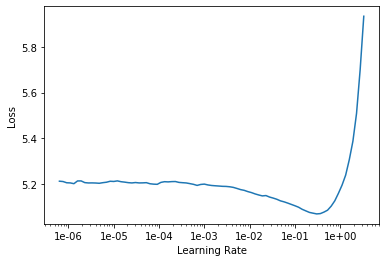

In [65]:
learn.lr_find()
learn.recorder.plot()

In [66]:
moms = (0.8,0.7)
wd = 0.1
learn.fit_one_cycle(1, 5E-02, moms=moms, wd=wd)


epoch,train_loss,valid_loss,accuracy,time
0,4.920287,4.663835,0.253527,00:09


In [0]:
#Like a computer vision model, we can then unfreeze the model and fine-tune it.
learn.unfreeze()


In [0]:
#saving for classification
learn.save_encoder('ft_enc')

In [70]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(working_path, df_trn, df_val,
                                      label_cols=["label"], text_cols=["text"],  vocab=data_lm.train_ds.vocab, bs=32)


In [86]:
#Building a classifier
learn = text_classifier_learner(data_clas,arch=AWD_LSTM, drop_mult=0.3)
learn.load_encoder('ft_enc')


RNNLearner(data=TextClasDataBunch;

Train: LabelList (11712 items)
x: TextList
xxbos airline thanks getting back xxunk weather advisories updated throughout day,xxbos airline love new st class breakfast,xxbos airline sitting xxmaj denver airport waiting plane xxunk xxmaj for hour half xxmaj hurry fuck xxmaj united fucking xxunk,xxbos airline xxup you xxup are xxup amazing xxup you xxup are xxup the xxup best xxup follow xxup me xxup please,xxbos airline would great i atleast next husband flying reservation
y: CategoryList
neutral,positive,negative,positive,negative
Path: /content;

Valid: LabelList (2928 items)
x: TextList
xxbos airline i sure anything xxunk time xxmaj other promises xxup ceo service gotten worse,xxbos xxmaj real xxup rt airline xxmaj our fleet fleek http co xxunk xxunk,xxbos airline flying xxup us air xxmaj the changes xxmaj cancelled xxmaj flightations leading today big xxunk unacceptable,xxbos airline credit replying i look forward hopefully one flight home tonight,

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


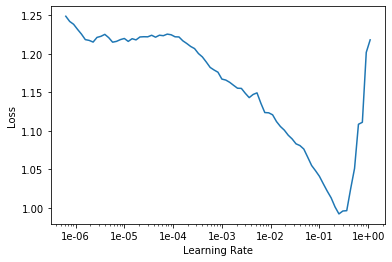

In [87]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [75]:
learn.fit_one_cycle(cyc_len=10, max_lr=1e-3, moms=(0.8, 0.7),wd = wd)

epoch,train_loss,valid_loss,accuracy,time
0,0.679487,0.647393,0.729167,00:13
1,0.655931,0.645701,0.732240,00:13
2,0.667679,0.647943,0.733265,00:13
3,0.619495,0.638695,0.738388,00:13
4,0.653558,0.645133,0.738388,00:13
5,0.646600,0.631404,0.741120,00:13
6,0.618951,0.626865,0.743852,00:13
7,0.606794,0.620843,0.744194,00:13
8,0.598971,0.621393,0.743169,00:13
9,0.605580,0.621211,0.747609,00:13


In [89]:
# optimal level
lr=1.3E-04
learn.fit_one_cycle(1,lr,moms=moms, wd=wd)

epoch,train_loss,valid_loss,accuracy,time
0,0.670022,0.663407,0.733607,00:13


In [90]:
#Again, we can unfreeze the model and fine-tune it.
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(lr/2., lr),moms=moms, wd=wd)


epoch,train_loss,valid_loss,accuracy,time
0,0.642181,0.663052,0.737363,00:13


In [93]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(lr/(2),lr),moms=moms, wd=wd)


epoch,train_loss,valid_loss,accuracy,time
0,0.565224,0.573373,0.765369,00:15


In [94]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(lr/100, lr),moms=moms, wd=wd)

epoch,train_loss,valid_loss,accuracy,time
0,0.528423,0.571890,0.768784,00:16


In [95]:
# get predictions
preds, targets = learn.get_preds()

predictions = np.argmax(preds, axis = 1)
pd.crosstab(predictions, targets)

col_0,0,1,2
row_0,,,
0,1689,282,147
1,107,282,45
2,40,56,280


In [96]:
#predict on a raw text by using the Learner.predict method.
learn.predict("That was a great flight")


(Category positive, tensor(2), tensor([0.0143, 0.0179, 0.9677]))